# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [6]:
# Code Here
%pip install palmerpenguins
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------------------ --------- 6.6/8.7 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 38.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%echo
import pandas as pd
import numpy as np
from plotnine import *
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


ECHO is on.


In [8]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [9]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [10]:
# dummify the categoricals
penguins = pd.get_dummies(penguins, columns=["species", "island", "sex"], drop_first=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [11]:
# Code Here
penguins = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm"])
x = penguins[["bill_length_mm"]].to_numpy()
y = penguins["bill_depth_mm"].to_numpy()


In [12]:
models = {}
degrees = [1, 2, 3, 10]

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)

    x_poly = poly.fit_transform(x)
    model = LinearRegression().fit(x_poly, y)

    y_pred = model.predict(x_poly)

    models[d] = {"poly": poly, "model": model, "y_pred": y_pred}

In [13]:
x_grid = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
plot_df = pd.DataFrame({
    "bill_length_mm": penguins["bill_length_mm"],
    "bill_depth_mm": penguins["bill_depth_mm"],
    "Type": "Data"
})

plot_df

,bill_length_mm,bill_depth_mm,Type
0,39.1,18.7,Data
1,39.5,17.4,Data
2,40.3,18.0,Data
4,36.7,19.3,Data
5,39.3,20.6,Data
...,...,...,...
339,55.8,19.8,Data
340,43.5,18.1,Data
341,49.6,18.2,Data
342,50.8,19.0,Data


In [14]:
for d in degrees:
    Xg_poly = models[d]["poly"].transform(x_grid)
    yg_pred = models[d]["model"].predict(Xg_poly)
    tmp = pd.DataFrame({
        "bill_length_mm": x_grid.flatten(),
        "bill_depth_mm": yg_pred,
        "Type": f"Degree {d}"
    })
    plot_df = pd.concat([plot_df, tmp])
plot_df

,bill_length_mm,bill_depth_mm,Type
0,39.100000,18.700000,Data
1,39.500000,17.400000,Data
2,40.300000,18.000000,Data
4,36.700000,19.300000,Data
5,39.300000,20.600000,Data
...,...,...,...
195,59.047236,16.813815,Degree 10
196,59.185427,16.769621,Degree 10
197,59.323618,16.738135,Degree 10
198,59.461809,16.721115,Degree 10


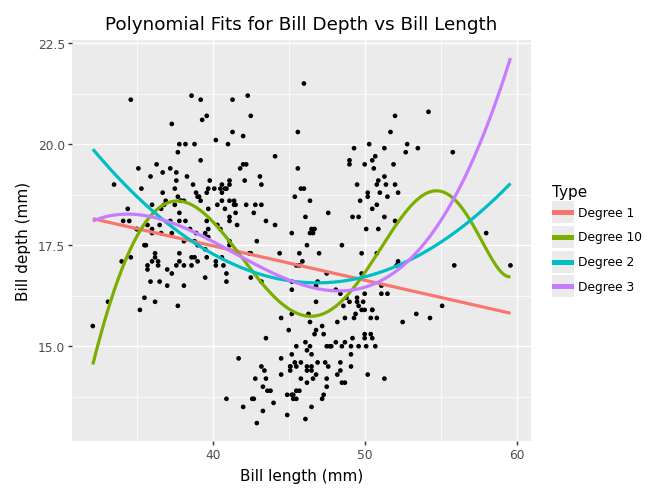

In [15]:
(ggplot(plot_df, aes(x = "bill_length_mm", y = "bill_depth_mm", color="Type"))
+ geom_point(data = plot_df[plot_df["Type"] == "Data"], size = 0.9, color = "black")
+ geom_line(data = plot_df[plot_df["Type"] != "Data"], size = 1.3)
+ labs(title = "Polynomial Fits for Bill Depth vs Bill Length",
        x = "Bill length (mm)", y = "Bill depth (mm)")
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model is definitely underfitting the data since it's quite simple and doesn't really tell us too much about the relationship between length and depth on its own. I would honestly say the same thing for quadratic, though it's slightly more reliable than linear.

Though the degree 10 model looks like a good fit, it may be overfitting. We can see it bend between neighboring points. probably fitting a lot of noise/high variance. also probably not an accurate description of the relationship between length and depth.

Therefore, the cubic model is the best fit here since its smoother but still flexible, and accounts for bias and variance in the data more equally.